# Notebook para Treinamento do Random Forest

### Instalação de Requirements

In [ ]:
! pip install -U scikit-learn
! pip install matplotlib
! pip install pyarrow
! pip install fastparquet

## Importação das Bibliotecas Necessárias
Aqui importamos todas as bibliotecas necessárias que serão usadas neste notebook, incluindo o Pandas para manipulação de dados, Random Forest para construir o modelo de classificação, e várias funções do sklearn para avaliação do modelo.

In [4]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

## Carregar e Balancear o Conjunto de Dados
Nós carregamos os dados de um arquivo Parquet. Dado o possível problema de desbalanceamento de classes com a variável 'SUICIDIO', balanceamos o conjunto de dados subamostrando a classe majoritária para igualar a contagem da classe minoritária. Isso ajuda a evitar que o modelo tenha viés em direção à classe majoritária.

In [6]:
df = pd.read_parquet("../data/processed/sim_2006_2017_pre_processed.parquet")

In [7]:
suicidio_0 = df[df['SUICIDIO'] == 0]
suicidio_1 = df[df['SUICIDIO'] == 1]

suicidio_0_sample = suicidio_0.sample(n=len(suicidio_1), replace=False)
balanced_df = pd.concat([suicidio_0_sample, suicidio_1], ignore_index=True).reset_index(drop=True)

## Preparar Dados para Treinamento
Aqui, selecionamos as características e a variável alvo do DataFrame balanceado, seguido pela divisão dos dados em conjuntos de treinamento e teste para avaliar o desempenho do modelo posteriormente.

In [8]:
X = balanced_df[['ESC', 'ESTCIV', 'IDADE' ,    'NATURAL' ,    'OCUP',    'RACACOR'    ,'MASCULINO',    'FEMININO'    ]].values
y = balanced_df['SUICIDIO'].values

### Divisão entre teste e treino

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o Modelo Random Forest

O Random Forest é uma técnica de aprendizado de conjunto (ensemble learning) que constrói múltiplas árvores de decisão durante o treinamento e as combina para obter uma predição mais robusta e geralmente mais precisa.

In [10]:
modelo_rf = RandomForestClassifier(max_depth=2, random_state=0)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

### Realizar previsões com o Modelo

In [11]:
y_pred = modelo_rf.predict(X_test)

# Avaliar o Modelo

In [12]:
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      4745
           1       0.78      0.79      0.78      4688

    accuracy                           0.78      9433
   macro avg       0.78      0.78      0.78      9433
weighted avg       0.78      0.78      0.78      9433

Matriz de Confusão:
 [[3673 1072]
 [ 979 3709]]


# Visualização dos dados

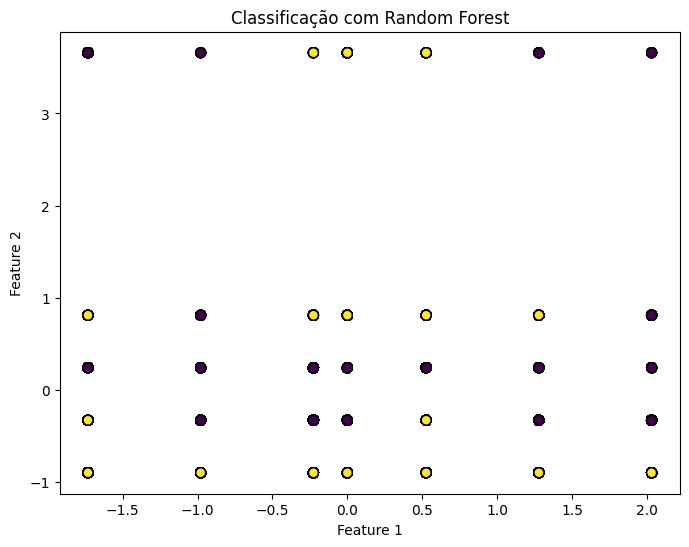

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', edgecolor='black', s=50)
plt.title('Classificação com Random Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [14]:
geovanna = pd.DataFrame({'ESC': 5,    'ESTCIV': 1,    'IDADE': 22,    'NATURAL': 53,    'OCUP': -1,    'RACACOR': 4,    'MASCULINO': False,    'FEMININO': True}, index=[0])

arthur = pd.DataFrame({'ESC': 5,    'ESTCIV': 1,    'IDADE': 21,    'NATURAL': 52,    'OCUP': -1,    'RACACOR': 1,    'MASCULINO': True,    'FEMININO': False}, index=[0])



doug = pd.DataFrame({'ESC': 4,    'ESTCIV': 2,    'IDADE': 34,    'NATURAL': 29,    'OCUP': 5132,    'RACACOR': 4,    'MASCULINO': True,    'FEMININO': False}, index=[0])



cozinheiro = pd.DataFrame({'ESC': 4,    'ESTCIV': 2,    'IDADE': 34,    'NATURAL': 29,    'OCUP': 5132,    'RACACOR': 4,    'MASCULINO': True,    'FEMININO': False}, index=[0])

In [15]:
teste = pd.concat((geovanna, arthur, doug, cozinheiro), ignore_index=True)

std = StandardScaler()
columns = ['ESC', 'ESTCIV', 'IDADE', 'OCUP', 'RACACOR']
teste[columns] = std.fit_transform(teste[columns])
x = teste[['ESC', 'ESTCIV', 'IDADE', 'NATURAL', 'OCUP', 'RACACOR', 'MASCULINO', 'FEMININO']].values

In [16]:
y_pred = modelo_rf.predict(x)
y_pred

array([1, 1, 0, 0], dtype=int64)